In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# File paths
weather_data_path = r"NYC_Weather_2013_2022.csv"
crime_data_path = r"NYC_crime.csv"
output_path = r"NYC_Cleaned.csv"

In [3]:
# --- Step 1: Load and Inspect Weather Data ---
weather_data = pd.read_csv(weather_data_path)

In [4]:
print("\n--- Weather Data Overview ---")
weather_data.head()


--- Weather Data Overview ---


,date,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
0,2013/1/1,6.9,0.0,0.0,0.0,40,26
1,2013/1/2,5.8,0.0,0.0,0.0,33,22
2,2013/1/3,4.5,0.0,0.0,0.0,32,24
3,2013/1/4,8.1,0.0,0.0,0.0,37,30
4,2013/1/5,6.7,0.0,0.0,0.0,42,32


In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3652 non-null   object 
 1   AWND    3432 non-null   float64
 2   PRCP    3652 non-null   float64
 3   SNOW    3652 non-null   float64
 4   SNWD    3652 non-null   float64
 5   TMAX    3652 non-null   int64  
 6   TMIN    3652 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 199.8+ KB


In [6]:
weather_data.describe()

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
count,3432.000000,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,5.177506,0.136432,0.086090,0.388171,63.340909,49.223439
std,2.373267,0.374129,0.797379,1.866793,18.187500,16.880310
min,0.000000,0.000000,0.000000,0.000000,13.000000,-1.000000
25%,3.400000,0.000000,0.000000,0.000000,48.000000,36.000000
50%,4.900000,0.000000,0.000000,0.000000,65.000000,50.000000
75%,6.500000,0.060000,0.000000,0.000000,79.000000,64.000000
max,18.300000,7.130000,27.300000,22.000000,98.000000,83.000000


In [7]:
print("Columns in weather data:", weather_data.columns)

Columns in weather data: Index(['date', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')


In [8]:
# Filter to required columns and check missing values
required_weather_columns = ['date', 'PRCP', 'SNOW', 'TMAX', 'TMIN']
weather_data = weather_data[required_weather_columns]
print("\nMissing values in required weather data:")
print(weather_data.isnull().sum())


Missing values in required weather data:
date    0
PRCP    0
SNOW    0
TMAX    0
TMIN    0
dtype: int64


In [9]:
# --- Step 2: Load and Inspect Crime Data ---
crime_data = pd.read_csv(crime_data_path)

In [10]:
print("\n--- Crime Data Overview ---")


--- Crime Data Overview ---


In [11]:
crime_data.head()

,Unnamed: 0,arrest_key,arrest_date,pd_desc,ofns_desc,law_code,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,0,192799737,2019-01-26,SEXUAL ABUSE,SEX CRIMES,PL 1306503,F,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,4.0,36.0,16.0
1,1,193260691,2019-02-06,CRIMINAL SALE OF A CONTROLLED SUBSTANCE,CONTROLLED SUBSTANCES OFFENSES,PL 2203400,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,4.0,10.0,8.0
2,2,149117452,2016-01-06,RAPE 3,RAPE,PL 1302503,F,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,2.0,11.0,40.0
3,3,190049060,2018-11-15,RAPE 1,RAPE,PL 1303501,F,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,2.0,49.0,49.0
4,4,24288194,2006-09-13,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,PL 140100E,M,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,2.0,49.0,49.0


In [12]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881989 entries, 0 to 3881988
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1   arrest_key                   int64  
 2   arrest_date                  object 
 3   pd_desc                      object 
 4   ofns_desc                    object 
 5   law_code                     object 
 6   law_cat_cd                   object 
 7   age_group                    object 
 8   perp_sex                     object 
 9   perp_race                    object 
 10  latitude                     float64
 11  longitude                    float64
 12  arrest_boro                  object 
 13  arrest_precinct              int64  
 14  jurisdiction_code            float64
 15  :@computed_region_f5dn_yrer  float64
 16  :@computed_region_yeji_bk3q  float64
 17  :@computed_region_92fq_4b7q  float64
 18  :@computed_region_sbqj_enih  float64
dtype

In [13]:
crime_data.describe()

,Unnamed: 0,arrest_key,latitude,longitude,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
count,3.881989e+06,3.881989e+06,3.881989e+06,3.881989e+06,3.881989e+06,3.881989e+06,3.876013e+06,3.876009e+06,3.876013e+06,3.876012e+06
mean,1.940994e+06,9.561076e+07,4.075640e+01,-7.392380e+01,6.063338e+01,1.303597e+00,3.688190e+01,3.379998e+00,2.868685e+01,3.746300e+01
std,1.120634e+06,5.213869e+07,4.448528e-01,7.218261e-02,3.431000e+01,9.418710e+00,2.096916e+01,1.207421e+00,1.415032e+01,2.131845e+01
min,0.000000e+00,9.926903e+06,4.049891e+01,-7.425494e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.704970e+05,5.899852e+07,4.067957e+01,-7.396708e+01,3.300000e+01,0.000000e+00,1.700000e+01,2.000000e+00,1.700000e+01,2.100000e+01
50%,1.940994e+06,8.327876e+07,4.074166e+01,-7.392548e+01,6.000000e+01,0.000000e+00,4.100000e+01,4.000000e+00,3.100000e+01,3.500000e+01
75%,2.911491e+06,1.435049e+08,4.081609e+01,-7.388586e+01,8.400000e+01,0.000000e+00,5.500000e+01,4.000000e+00,4.000000e+01,5.400000e+01
max,3.881988e+06,2.068936e+08,6.208307e+01,-7.368178e+01,1.230000e+02,9.700000e+01,7.100000e+01,5.000000e+00,5.100000e+01,7.700000e+01


In [14]:
print("Columns in crime data:", crime_data.columns)

Columns in crime data: Index(['Unnamed: 0', 'arrest_key', 'arrest_date', 'pd_desc', 'ofns_desc',
       'law_code', 'law_cat_cd', 'age_group', 'perp_sex', 'perp_race',
       'latitude', 'longitude', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', ':@computed_region_f5dn_yrer',
       ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q',
       ':@computed_region_sbqj_enih'],
      dtype='object')


In [15]:
crime_data_null_counts = crime_data.isnull().sum()
crime_data_null_counts

Unnamed: 0                         0
arrest_key                         0
arrest_date                        0
pd_desc                            0
ofns_desc                          0
law_code                           0
law_cat_cd                     13360
age_group                          0
perp_sex                           0
perp_race                          0
latitude                           0
longitude                          0
arrest_boro                        0
arrest_precinct                    0
jurisdiction_code                  0
:@computed_region_f5dn_yrer     5976
:@computed_region_yeji_bk3q     5980
:@computed_region_92fq_4b7q     5976
:@computed_region_sbqj_enih     5977
dtype: int64

In [16]:
crime_data_cleaned= crime_data.dropna()
crime_data_cleaned.shape

(3862648, 19)

In [17]:
non_float_columns = crime_data_cleaned.select_dtypes(exclude=['float']).columns

# Count unique categories for each non-float column
category_counts = crime_data_cleaned[non_float_columns].nunique()
category_counts

Unnamed: 0         3862648
arrest_key         3862648
arrest_date           5113
pd_desc                416
ofns_desc               98
law_code              2306
law_cat_cd               4
age_group                5
perp_sex                 2
perp_race                8
arrest_boro              5
arrest_precinct         77
dtype: int64

In [18]:
# Identify columns starting with '@'
at_columns = [col for col in crime_data_cleaned.columns if col.startswith(':@')]

# Count unique categories for each '@' column
at_column_category_counts = crime_data_cleaned[at_columns].nunique()
at_column_category_counts

:@computed_region_f5dn_yrer    71
:@computed_region_yeji_bk3q     5
:@computed_region_92fq_4b7q    51
:@computed_region_sbqj_enih    77
dtype: int64

### By definition arrest_boro and @computed_region_yeji_bk3q  are the same data
### and arrest_precinct and @computed_region_sbqj_enih are same
### Drop the depulicate columns
### pd_desc are almost same to ofns_desc by definition, so we keep ofns_desc only
### law_code has too many catagrories so we removed it

In [19]:
crime_data_cleaned = crime_data_cleaned.drop(columns=['law_code','pd_desc',':@computed_region_sbqj_enih', ':@computed_region_yeji_bk3q'])


In [20]:
crime_data_cleaned.head()

,Unnamed: 0,arrest_key,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,latitude,longitude,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q
0,0,192799737,2019-01-26,SEX CRIMES,F,45-64,M,BLACK,40.800694,-73.941109,M,25,0.0,7.0,36.0
1,1,193260691,2019-02-06,CONTROLLED SUBSTANCES OFFENSES,F,25-44,M,UNKNOWN,40.757839,-73.991212,M,14,0.0,12.0,10.0
2,2,149117452,2016-01-06,RAPE,F,25-44,M,BLACK,40.648650,-73.950336,K,67,0.0,61.0,11.0
3,3,190049060,2018-11-15,RAPE,F,25-44,M,BLACK,40.674583,-73.930222,K,77,0.0,16.0,49.0
4,4,24288194,2006-09-13,CRIMINAL TRESPASS,M,45-64,M,BLACK,40.671254,-73.926714,K,77,2.0,16.0,49.0


In [21]:
crime_data_cleaned = crime_data_cleaned.drop(columns=['Unnamed: 0','arrest_key','latitude','longitude'])

In [22]:
crime_data_cleaned.head()

,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q
0,2019-01-26,SEX CRIMES,F,45-64,M,BLACK,M,25,0.0,7.0,36.0
1,2019-02-06,CONTROLLED SUBSTANCES OFFENSES,F,25-44,M,UNKNOWN,M,14,0.0,12.0,10.0
2,2016-01-06,RAPE,F,25-44,M,BLACK,K,67,0.0,61.0,11.0
3,2018-11-15,RAPE,F,25-44,M,BLACK,K,77,0.0,16.0,49.0
4,2006-09-13,CRIMINAL TRESPASS,M,45-64,M,BLACK,K,77,2.0,16.0,49.0


In [23]:
crime_data_cleaned.shape

(3862648, 11)

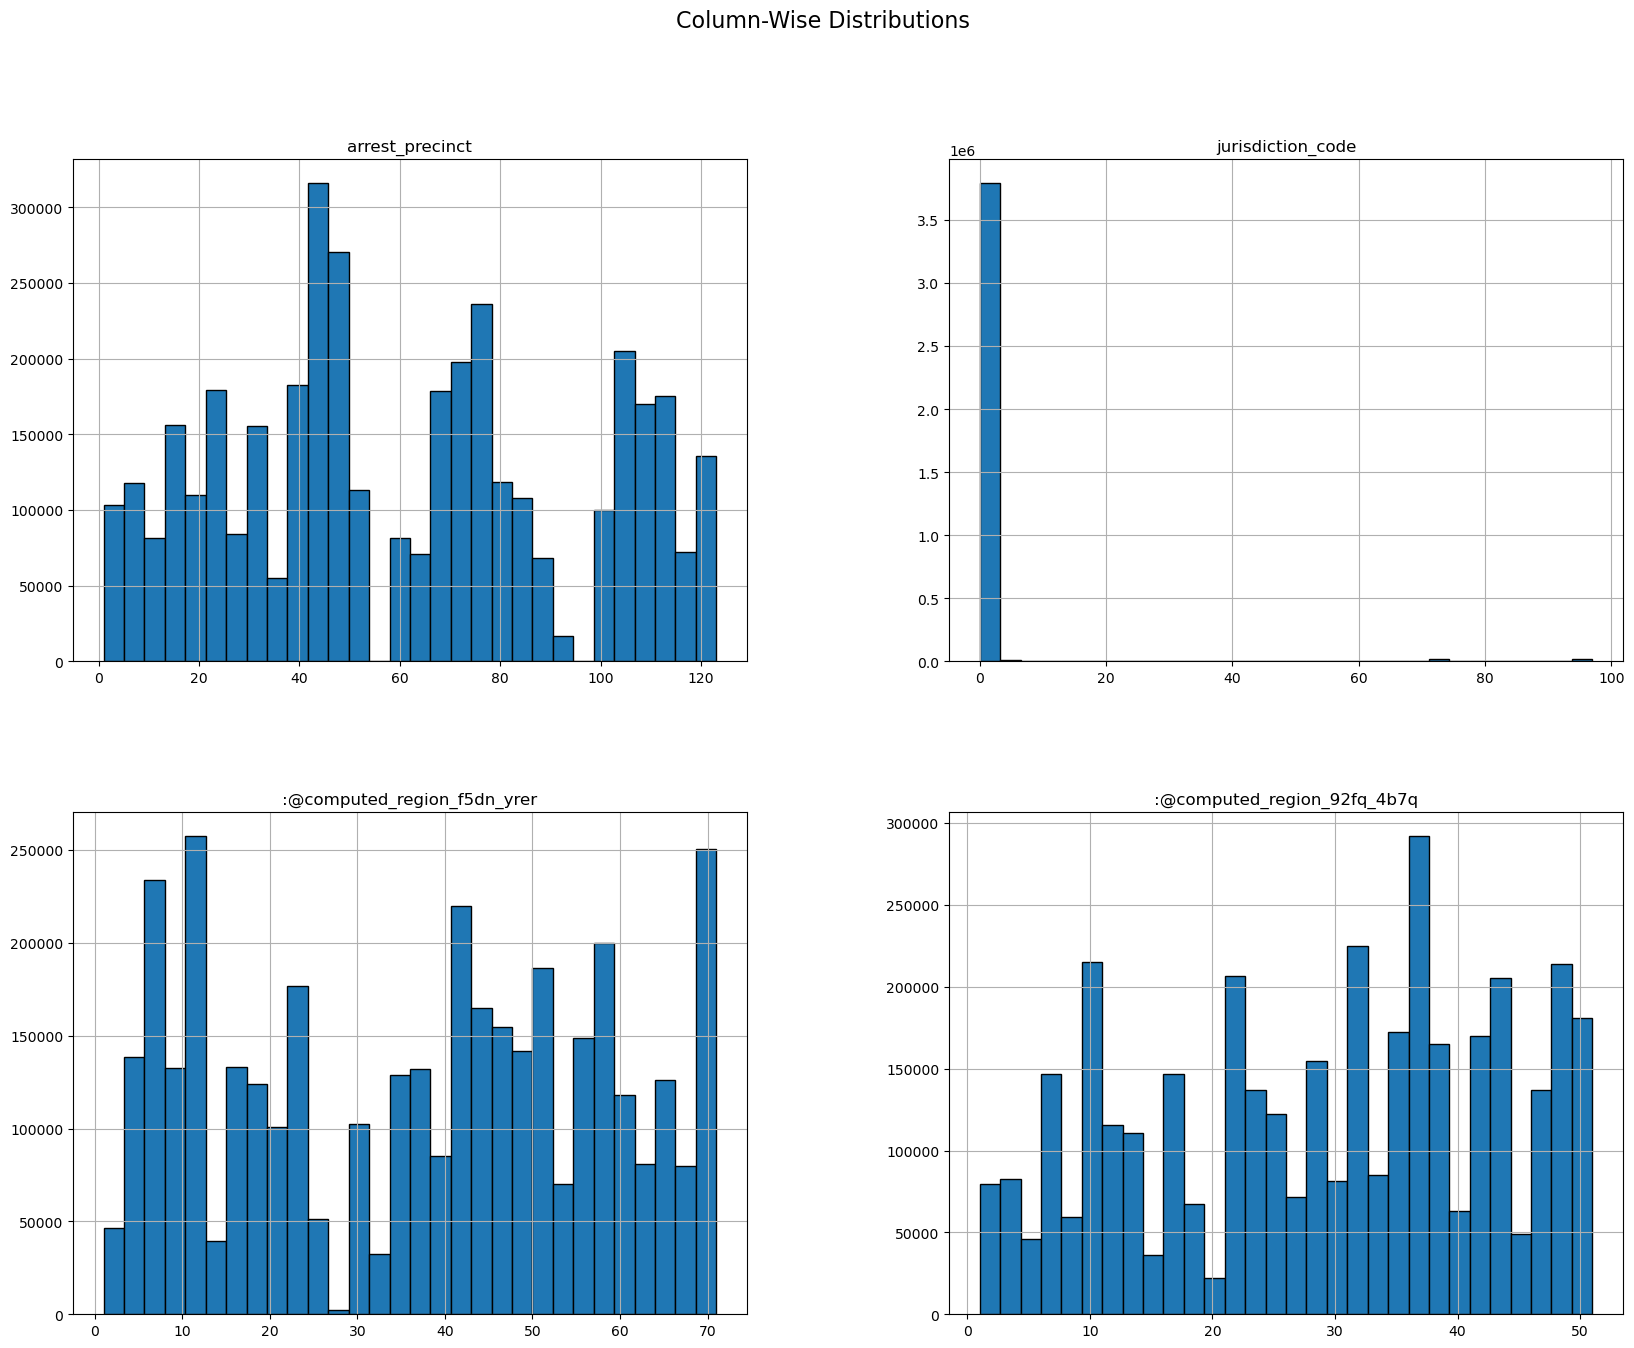

In [24]:
crime_data_cleaned.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Column-Wise Distributions", fontsize=16)
plt.show()

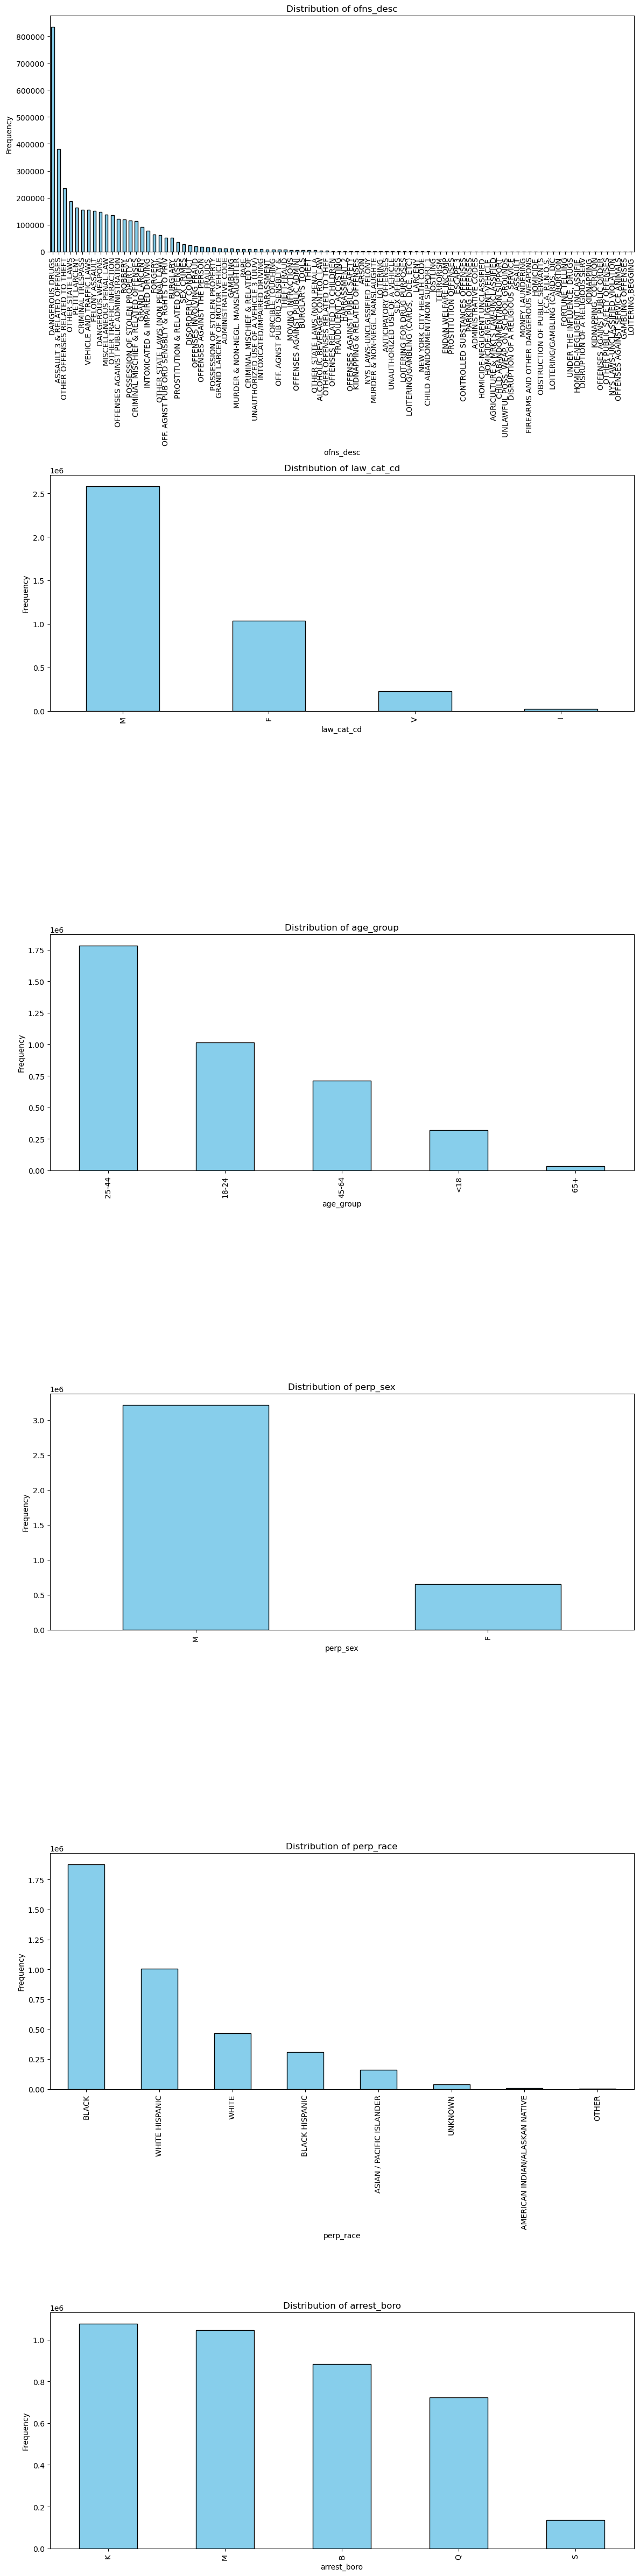

In [25]:
categorical_columns = crime_data_cleaned.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'arrest_date']

# Plot bar charts for remaining categorical columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, len(categorical_columns) * 8))

for i, col in enumerate(categorical_columns):
    ax = axes[i] if len(categorical_columns) > 1 else axes
    crime_data_cleaned[col].value_counts().plot(
        kind='bar',
        ax=ax,
        title=f"Distribution of {col}",
        color='skyblue',
        edgecolor='black'
    )
    ax.set_ylabel("Frequency")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


In [26]:
crime_data_cleaned['arrest_year'] = pd.to_datetime(crime_data_cleaned['arrest_date']).dt.year
crime_data_cleaned['arrest_month'] = pd.to_datetime(crime_data_cleaned['arrest_date']).dt.month
crime_data_cleaned['arrest_day'] = pd.to_datetime(crime_data_cleaned['arrest_date']).dt.day

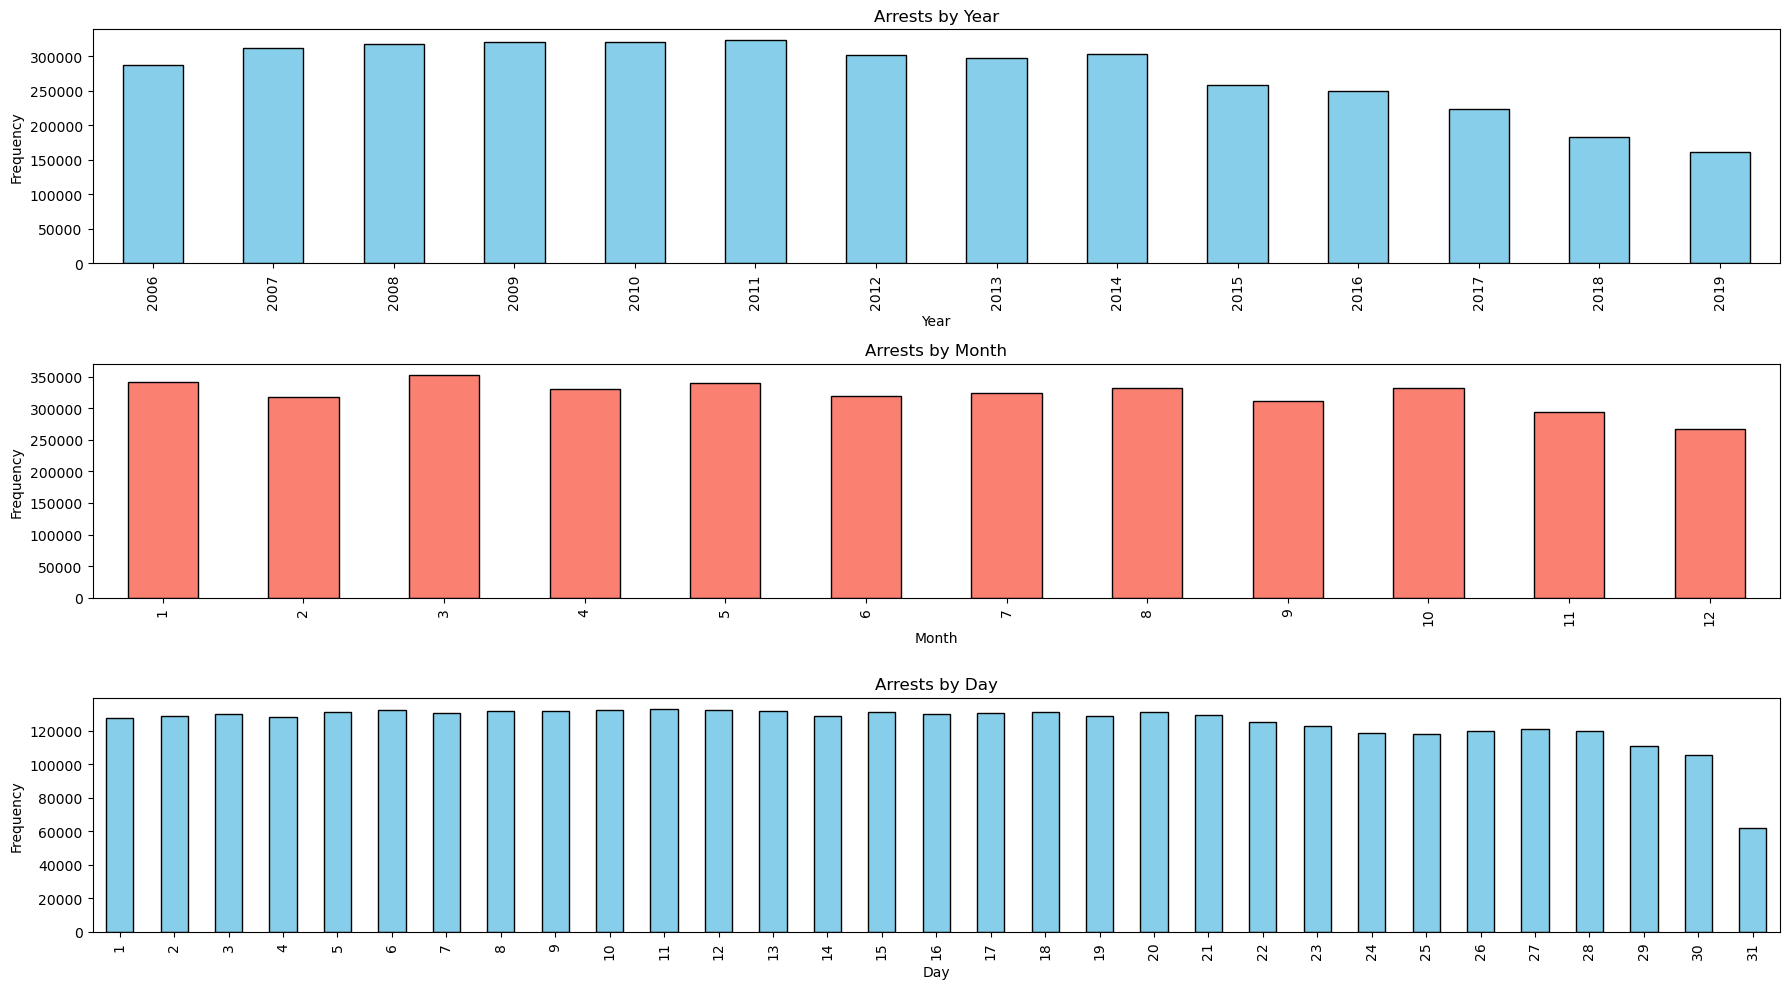

In [27]:
# Plot histograms for year and month distributions
fig, axes = plt.subplots(3, 1, figsize=(18, 10))

# Histogram for years
crime_data_cleaned['arrest_year'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[0],
    color='skyblue',
    edgecolor='black',
    title='Arrests by Year'
)
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Year')

# Histogram for months
crime_data_cleaned['arrest_month'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[1],
    color='salmon',
    edgecolor='black',
    title='Arrests by Month'
)
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Month')

crime_data_cleaned['arrest_day'].value_counts().sort_index().plot(
    kind='bar',
    ax=axes[2],
    color='skyblue',
    edgecolor='black',
    title='Arrests by Day'
)
axes[2].set_ylabel('Frequency')
axes[2].set_xlabel('Day')

plt.tight_layout()
plt.show()

## Join the weather data

In [28]:
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [29]:
# Convert 'arrest_date' column in crime_data_cleaned to datetime
crime_data_cleaned['arrest_date'] = pd.to_datetime(crime_data_cleaned['arrest_date'])

In [30]:
weather_data['date'].unique()

<DatetimeArray>
['2013-01-01 00:00:00', '2013-01-02 00:00:00', '2013-01-03 00:00:00',
 '2013-01-04 00:00:00', '2013-01-05 00:00:00', '2013-01-06 00:00:00',
 '2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00',
 '2013-01-10 00:00:00',
 ...
 '2022-12-22 00:00:00', '2022-12-23 00:00:00', '2022-12-24 00:00:00',
 '2022-12-25 00:00:00', '2022-12-26 00:00:00', '2022-12-27 00:00:00',
 '2022-12-28 00:00:00', '2022-12-29 00:00:00', '2022-12-30 00:00:00',
 '2022-12-31 00:00:00']
Length: 3652, dtype: datetime64[ns]

In [31]:
crime_data_cleaned['arrest_date'].unique()

<DatetimeArray>
['2019-01-26 00:00:00', '2019-02-06 00:00:00', '2016-01-06 00:00:00',
 '2018-11-15 00:00:00', '2006-09-13 00:00:00', '2018-10-24 00:00:00',
 '2019-04-23 00:00:00', '2019-05-04 00:00:00', '2019-05-23 00:00:00',
 '2018-10-23 00:00:00',
 ...
 '2006-09-20 00:00:00', '2006-10-02 00:00:00', '2006-10-19 00:00:00',
 '2006-10-10 00:00:00', '2006-10-20 00:00:00', '2006-09-29 00:00:00',
 '2006-10-03 00:00:00', '2006-10-05 00:00:00', '2006-09-19 00:00:00',
 '2006-09-24 00:00:00']
Length: 5113, dtype: datetime64[ns]

In [32]:
# Merge the datasets on the date fields
merged_data = pd.merge(
    crime_data_cleaned, 
    weather_data, 
    left_on='arrest_date', 
    right_on='date', 
    how='inner'
)

In [33]:
merged_data.head()

,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q,arrest_year,arrest_month,arrest_day,date,PRCP,SNOW,TMAX,TMIN
0,2019-01-26,SEX CRIMES,F,45-64,M,BLACK,M,25,0.0,7.0,36.0,2019,1,26,2019-01-26,0.0,0.0,35,24
1,2019-01-26,ASSAULT 3 & RELATED OFFENSES,M,25-44,F,BLACK,Q,105,0.0,63.0,47.0,2019,1,26,2019-01-26,0.0,0.0,35,24
2,2019-01-26,FELONY ASSAULT,F,25-44,F,WHITE HISPANIC,B,43,0.0,58.0,31.0,2019,1,26,2019-01-26,0.0,0.0,35,24
3,2019-01-26,ASSAULT 3 & RELATED OFFENSES,M,25-44,M,BLACK,B,52,0.0,24.0,40.0,2019,1,26,2019-01-26,0.0,0.0,35,24
4,2019-01-26,DANGEROUS DRUGS,M,25-44,M,WHITE,S,120,0.0,4.0,13.0,2019,1,26,2019-01-26,0.0,0.0,35,24


In [34]:
merged_data = merged_data.drop(columns=['date'])
merged_data.head()

,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q,arrest_year,arrest_month,arrest_day,PRCP,SNOW,TMAX,TMIN
0,2019-01-26,SEX CRIMES,F,45-64,M,BLACK,M,25,0.0,7.0,36.0,2019,1,26,0.0,0.0,35,24
1,2019-01-26,ASSAULT 3 & RELATED OFFENSES,M,25-44,F,BLACK,Q,105,0.0,63.0,47.0,2019,1,26,0.0,0.0,35,24
2,2019-01-26,FELONY ASSAULT,F,25-44,F,WHITE HISPANIC,B,43,0.0,58.0,31.0,2019,1,26,0.0,0.0,35,24
3,2019-01-26,ASSAULT 3 & RELATED OFFENSES,M,25-44,M,BLACK,B,52,0.0,24.0,40.0,2019,1,26,0.0,0.0,35,24
4,2019-01-26,DANGEROUS DRUGS,M,25-44,M,WHITE,S,120,0.0,4.0,13.0,2019,1,26,0.0,0.0,35,24


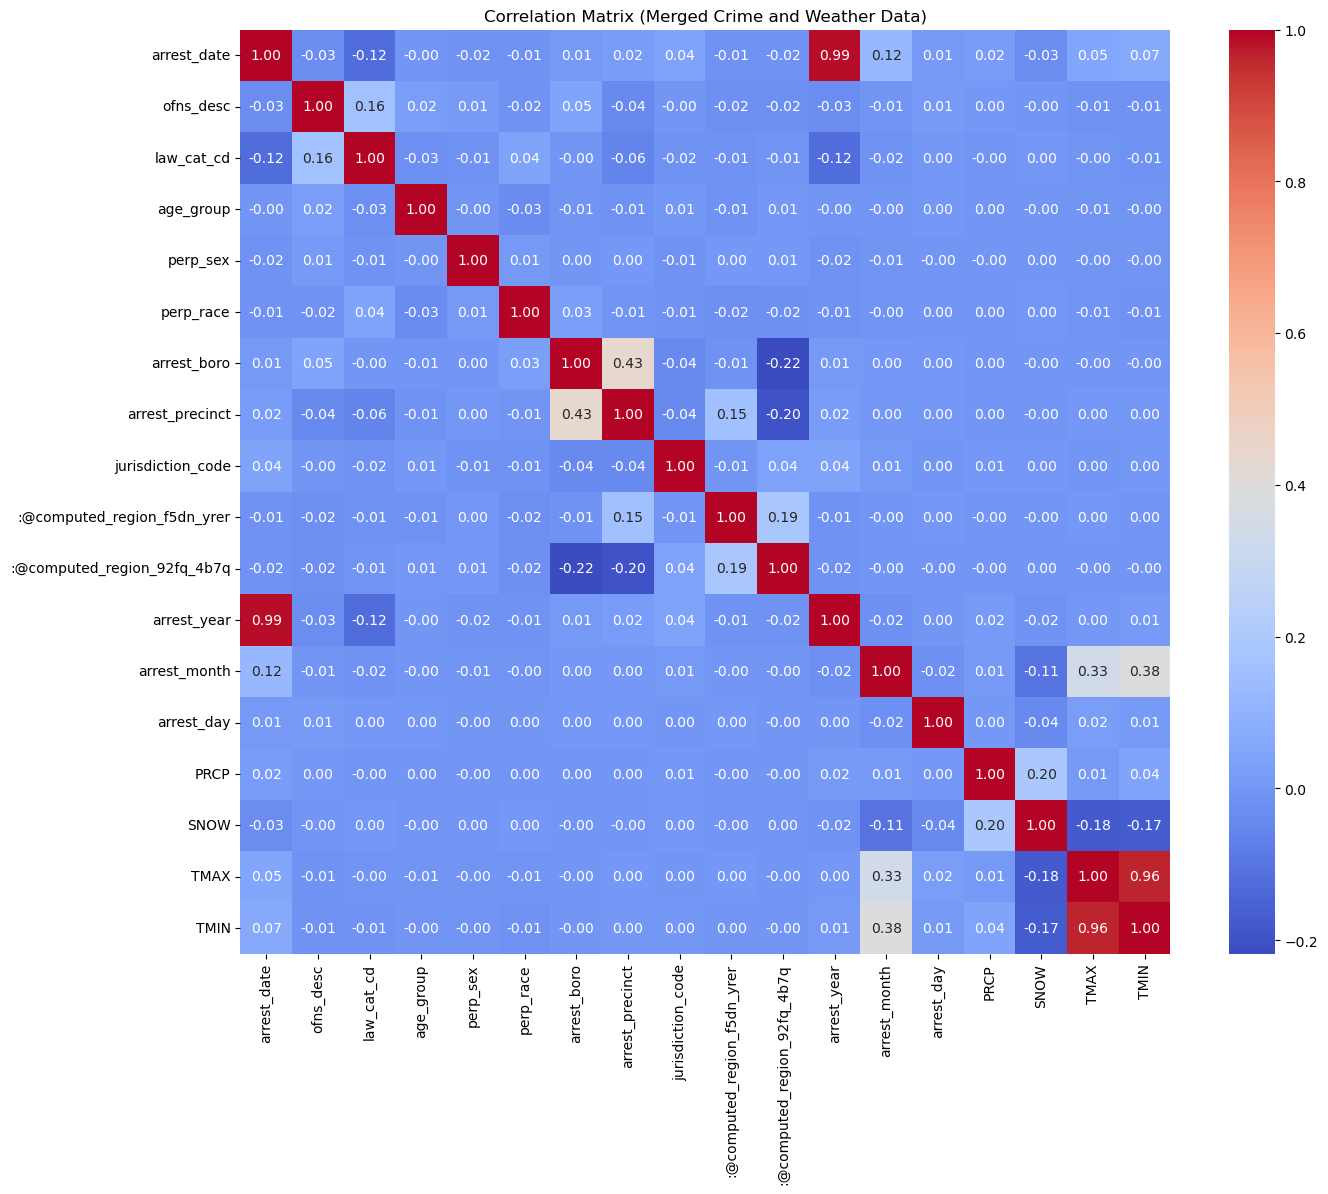

In [35]:
#correlations
encoded_merged_data = merged_data.copy()
categorical_columns_merged = merged_data.select_dtypes(include=['object']).columns

for col in categorical_columns_merged:
    encoded_merged_data[col] = encoded_merged_data[col].astype('category').cat.codes

# Compute the correlation matrix for the encoded merged dataset
merged_correlation_matrix = encoded_merged_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(merged_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix (Merged Crime and Weather Data)")
plt.show()

In [36]:
merged_data['TDELTA'] = merged_data['TMAX'] - merged_data['TMIN']
merged_data = merged_data.drop(columns=['TMAX'])

In [37]:
merged_data.head()

,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q,arrest_year,arrest_month,arrest_day,PRCP,SNOW,TMIN,TDELTA
0,2019-01-26,SEX CRIMES,F,45-64,M,BLACK,M,25,0.0,7.0,36.0,2019,1,26,0.0,0.0,24,11
1,2019-01-26,ASSAULT 3 & RELATED OFFENSES,M,25-44,F,BLACK,Q,105,0.0,63.0,47.0,2019,1,26,0.0,0.0,24,11
2,2019-01-26,FELONY ASSAULT,F,25-44,F,WHITE HISPANIC,B,43,0.0,58.0,31.0,2019,1,26,0.0,0.0,24,11
3,2019-01-26,ASSAULT 3 & RELATED OFFENSES,M,25-44,M,BLACK,B,52,0.0,24.0,40.0,2019,1,26,0.0,0.0,24,11
4,2019-01-26,DANGEROUS DRUGS,M,25-44,M,WHITE,S,120,0.0,4.0,13.0,2019,1,26,0.0,0.0,24,11


In [38]:
df = merged_data.copy()
df['ofns_desc'] = merged_data['ofns_desc'].astype('category').cat.codes

In [39]:
df.head()

,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q,arrest_year,arrest_month,arrest_day,PRCP,SNOW,TMIN,TDELTA
0,2019-01-26,86,F,45-64,M,BLACK,M,25,0.0,7.0,36.0,2019,1,26,0.0,0.0,24,11
1,2019-01-26,8,M,25-44,F,BLACK,Q,105,0.0,63.0,47.0,2019,1,26,0.0,0.0,24,11
2,2019-01-26,25,F,25-44,F,WHITE HISPANIC,B,43,0.0,58.0,31.0,2019,1,26,0.0,0.0,24,11
3,2019-01-26,8,M,25-44,M,BLACK,B,52,0.0,24.0,40.0,2019,1,26,0.0,0.0,24,11
4,2019-01-26,17,M,25-44,M,WHITE,S,120,0.0,4.0,13.0,2019,1,26,0.0,0.0,24,11


In [40]:
merged_data['law_cat_cd'].value_counts()

law_cat_cd
M    1096828
F     489694
V      82849
I       7827
Name: count, dtype: int64

In [41]:
severity_mapping = {'I':0,'V': 3, 'M': 2, 'F': 1}
df['law_cat_cd'] = df['law_cat_cd'].map(severity_mapping)

In [42]:
df.head()

,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q,arrest_year,arrest_month,arrest_day,PRCP,SNOW,TMIN,TDELTA
0,2019-01-26,86,1,45-64,M,BLACK,M,25,0.0,7.0,36.0,2019,1,26,0.0,0.0,24,11
1,2019-01-26,8,2,25-44,F,BLACK,Q,105,0.0,63.0,47.0,2019,1,26,0.0,0.0,24,11
2,2019-01-26,25,1,25-44,F,WHITE HISPANIC,B,43,0.0,58.0,31.0,2019,1,26,0.0,0.0,24,11
3,2019-01-26,8,2,25-44,M,BLACK,B,52,0.0,24.0,40.0,2019,1,26,0.0,0.0,24,11
4,2019-01-26,17,2,25-44,M,WHITE,S,120,0.0,4.0,13.0,2019,1,26,0.0,0.0,24,11


In [43]:
merged_data['age_group'].value_counts()

age_group
25-44    810627
18-24    417042
45-64    327831
<18      104609
65+       17089
Name: count, dtype: int64

In [44]:
age_mapping = {
    '25-44': 2,
    '18-24': 1,
    '45-64': 3,
    '<18': 0,
    '65+': 4
}

df['age_group'] = df['age_group'].map(age_mapping)

In [45]:
df.head()

,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q,arrest_year,arrest_month,arrest_day,PRCP,SNOW,TMIN,TDELTA
0,2019-01-26,86,1,3,M,BLACK,M,25,0.0,7.0,36.0,2019,1,26,0.0,0.0,24,11
1,2019-01-26,8,2,2,F,BLACK,Q,105,0.0,63.0,47.0,2019,1,26,0.0,0.0,24,11
2,2019-01-26,25,1,2,F,WHITE HISPANIC,B,43,0.0,58.0,31.0,2019,1,26,0.0,0.0,24,11
3,2019-01-26,8,2,2,M,BLACK,B,52,0.0,24.0,40.0,2019,1,26,0.0,0.0,24,11
4,2019-01-26,17,2,2,M,WHITE,S,120,0.0,4.0,13.0,2019,1,26,0.0,0.0,24,11


In [46]:
merged_data['perp_sex'].value_counts()

perp_sex
M    1387596
F     289602
Name: count, dtype: int64

In [47]:
merged_data['perp_race'].value_counts()

perp_race
BLACK                             802927
WHITE HISPANIC                    426305
WHITE                             203434
BLACK HISPANIC                    143498
ASIAN / PACIFIC ISLANDER           79473
UNKNOWN                            17446
AMERICAN INDIAN/ALASKAN NATIVE      4115
Name: count, dtype: int64

In [48]:
merged_data['arrest_boro'].value_counts()

arrest_boro
K    465035
M    449967
B    371184
Q    329016
S     61996
Name: count, dtype: int64

In [49]:
perp_sex_mapping = {'M': 0, 'F': 1}
perp_race_mapping = {
    'BLACK': 1,
    'WHITE HISPANIC': 2,
    'WHITE': 3,
    'BLACK HISPANIC': 4,
    'ASIAN / PACIFIC ISLANDER': 5,
    'UNKNOWN': 0,
    'AMERICAN INDIAN/ALASKAN NATIVE': 6
}
arrest_boro_mapping = {'K': 1, 'M': 2, 'B': 3, 'Q': 4, 'S': 5}
df['perp_sex'] = df['perp_sex'].map(perp_sex_mapping)
df['perp_race'] = df['perp_race'].map(perp_race_mapping)
df['arrest_boro'] = df['arrest_boro'].map(arrest_boro_mapping)

In [50]:
df.head()

,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q,arrest_year,arrest_month,arrest_day,PRCP,SNOW,TMIN,TDELTA
0,2019-01-26,86,1,3,0,1,2,25,0.0,7.0,36.0,2019,1,26,0.0,0.0,24,11
1,2019-01-26,8,2,2,1,1,4,105,0.0,63.0,47.0,2019,1,26,0.0,0.0,24,11
2,2019-01-26,25,1,2,1,2,3,43,0.0,58.0,31.0,2019,1,26,0.0,0.0,24,11
3,2019-01-26,8,2,2,0,1,3,52,0.0,24.0,40.0,2019,1,26,0.0,0.0,24,11
4,2019-01-26,17,2,2,0,3,5,120,0.0,4.0,13.0,2019,1,26,0.0,0.0,24,11


In [51]:
df.to_csv("df.csv")

In [52]:
df.describe()

,arrest_date,ofns_desc,law_cat_cd,age_group,perp_sex,perp_race,arrest_boro,arrest_precinct,jurisdiction_code,:@computed_region_f5dn_yrer,:@computed_region_92fq_4b7q,arrest_year,arrest_month,arrest_day,PRCP,SNOW,TMIN,TDELTA
count,1677198,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06,1.677198e+06
mean,2016-01-28 10:04:23.573888512,4.438428e+01,1.748092e+00,1.842445e+00,1.726701e-01,1.944843e+00,2.447275e+00,6.117878e+01,1.407899e+00,3.670293e+01,2.837595e+01,2.015592e+03,6.331186e+00,1.543062e+01,1.217114e-01,7.323763e-02,4.918455e+01,1.429194e+01
min,2013-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,2.000000e+00
25%,2014-05-20 00:00:00,1.700000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.300000e+01,0.000000e+00,1.700000e+01,1.600000e+01,2.014000e+03,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,3.600000e+01,1.100000e+01
50%,2015-11-27 00:00:00,3.300000e+01,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,6.000000e+01,0.000000e+00,4.000000e+01,3.000000e+01,2.015000e+03,6.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,5.100000e+01,1.400000e+01
75%,2017-08-21 00:00:00,7.400000e+01,2.000000e+00,2.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,8.800000e+01,0.000000e+00,5.500000e+01,4.100000e+01,2.017000e+03,9.000000e+00,2.300000e+01,5.000000e-02,0.000000e+00,6.400000e+01,1.700000e+01
max,2019-12-31 00:00:00,9.500000e+01,3.000000e+00,4.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,1.230000e+02,9.700000e+01,7.100000e+01,5.100000e+01,2.019000e+03,1.200000e+01,3.100000e+01,4.970000e+00,2.730000e+01,8.300000e+01,3.900000e+01
std,NaN,3.062567e+01,5.445900e-01,8.423393e-01,3.779620e-01,1.202722e+00,1.189909e+00,3.466449e+01,9.879747e+00,2.099897e+01,1.435723e+01,1.934413e+00,3.388362e+00,8.688410e+00,3.397485e-01,6.397008e-01,1.712429e+01,5.048371e+00
